<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-некорректных-данных-и-аномалий" data-toc-modified-id="Поиск-некорректных-данных-и-аномалий-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск некорректных данных и аномалий</a></span></li><li><span><a href="#Расчет-показателей-для-каждого-пользователя" data-toc-modified-id="Расчет-показателей-для-каждого-пользователя-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Расчет показателей для каждого пользователя</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

На исследования предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель**  
Проанализировать поведение клиентов мобильного оператора и сделать вывод – какой из исследуемых тарифов лучше.

**Краткое описание**  
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Структура исследования**
1. Изучение данных
2. Предобработка данных  
3. Анализ данных
4. Проверка статистических гипотез

**Использование дополнительных модулей и библиотек**

- `pandas` – редактор баз данных
- `math` – работа с математическими функциями
- `matplotlib`, `seaborn` – построение графиков
- `scipy` – работа со статистическими функциями

## Изучение данных

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

**Расшифровка наименований столбцов:**

Таблица `users` (информация о пользователях):
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tarif` — название тарифного плана  

Таблица `calls` (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок  

Таблица `messages` (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение  

Таблица `internet` (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя  

Таблица `tariffs` (информация о тарифах):
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [2]:
# таблица 'calls' (информация о звонках)
df_calls = pd.read_csv('calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
# общие данные о датафрейме 'df_calls'
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Явных пропусков данных нет.  

Столбец `call_date` должен быть приведен к типу данных `datetime`.  

Из первоначальных условий следует, что сотовый оператор «Мегалайн» всегда округляет секунды до минут. 
Таким образом, все данные в ячейках столбца `duration` должны быть округлены в большую сторону (до ближайшего большего целого числа).  

Необходимо отметить, что перед округлением до целого числа гигабайт, предварительно нужно просуммировать трафик за весь отчетный период – т.е. за месяц.

In [4]:
# таблица 'internet' (информация об интернет-сессиях)
df_internet = pd.read_csv('internet.csv')
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
# общие данные о датафрейме 'df_internet'
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Явных пропусков данных нет.  

Столбец `session_date` должен быть приведен к типу данных `datetime`.  

Из первоначальных условий следует, что сотовый оператор «Мегалайн» всегда округляет мегабайты до гигабайт. 
Таким образом, все данные в ячейках столбца `mb_used` должны быть округлены в большую сторону (до ближайшего большего целого числа гигабайт).

In [6]:
# таблица 'messages' (информация о сообщениях)
df_messages = pd.read_csv('messages.csv')
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
# общие данные о датафрейме 'df_messages'
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Явных пропусков данных нет.  

Столбец `message_date` должен быть приведен к типу данных `datetime`.  

In [8]:
# таблица `tariffs` (информация о тарифах)
df_tariffs = pd.read_csv('tariffs.csv')
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
# общие данные о датафрейме 'df_tariffs'
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Явных пропусков данных нет.  

Расшифровка наименований тарифов в столбце `tariff_name`.

Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля; 
    * сообщение: 3 рубля;
    * 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»  

- Ежемесячная плата: 1950 рублей  
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль;
    * сообщение: 1 рубль;
    * 1 Гб интернет-трафика: 150 рублей.
    
Примечание:  

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.  

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [10]:
# таблица `users` (информация о пользователях)
df_users = pd.read_csv('users.csv')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
# общие данные о датафрейме 'df_users'
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Из первоначальных условий следует, что пропуск данных в столбце `churn_date` указывает на активное использование тарифа в момент выгрузки данных.  

Столбцы `churn_date` и `reg_date` должны быть приведены к типу данных `datetime`.  

In [12]:
# проверка отсутствия дубликатов строк во всех датафреймах (за исключением 'df_tariffs', т.к. в нем всего две строки)
df_dicts = {'df_calls': df_calls, 'df_internet': df_internet, 'df_messages': df_messages, 'df_users': df_users}

for col_name, df_name in df_dicts.items():
    if df_name.duplicated().sum() == 0:
        print(f'В датафрейме {col_name} дубликаты отсутствуют')
    else:
        print(f'В датафрейме {col_name} обнаружены дубликаты')
        

В датафрейме df_calls дубликаты отсутствуют
В датафрейме df_internet дубликаты отсутствуют
В датафрейме df_messages дубликаты отсутствуют
В датафрейме df_users дубликаты отсутствуют


### Выводы

Выполнено преобразование считанной информации в отдельные датафрейма. Получена первичная информация данных через метод `.info()`.

## Предобработка данных

Приведение к типу данных `datetime` требуется выполнить для следующих датафреймов и соответствующих им столбцов:
- `df_calls` столбец `date`
- `df_internet` столбец `session_date`
- `df_messages` столбец `message_date`
- `df_users` столбец `reg_date` (обработка столбца `churn_date` возможна после заполнения пропусков)

In [13]:
# создадим словарь, где ключ – имя столбца, значение – имя датафрейма
convert_to_date = {'call_date': df_calls, 'session_date': df_internet, 'message_date': df_messages, 'reg_date': df_users}

# через цикл выполним приведение типа данных
for col_name, df_name in convert_to_date.items():
    df_name[col_name] = pd.to_datetime(df_name[col_name], format='%Y-%m-%d')

In [14]:
# выборочная проверка изменения типа данных, датафрейм 'df_internet' столбец 'session_date' тип данных 'datetime'
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Округление требуется выполнить для следующих датафреймов и соответствующих им столбцов:
- `df_calls` столбец `duration`: округление в большую сторону (до ближайшего большего целого числа)
- `df_internet` столбец `mb_used`: округление в большую сторону (до ближайшего большего целого числа гигабайт). Предварительно весь трафик требуется просуммировать за отчетный период (месяц).

In [15]:
# округление до ближайшего большего, датафрейм 'df_calls' столбец 'duration'
df_calls['duration'] = df_calls['duration'].apply(math.ceil)

### Поиск некорректных данных и аномалий

**Датафрейм `df_calls`**

In [16]:
# общие сведения о числовых характеристиках
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


В исследуемом датафрейме фиксируются звонки с нулевой продолжительностью (столбец `duration`). Из первоначальных условий следует, что «В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.»

**Датафрейм `df_internet`**

In [17]:
# общие сведения о числовых характеристиках
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В исследуемом датафрейме фиксируется нулевой расход трафика (столбец `mb_used`). Вполне возможно, что эта категория пользователей является перспективной для дальнейшего более глубокого исследования (вопрос исследования: почему абонентами не используется предоплаченный трафик в рамках действующего тарифа). 

**Датафрейм `df_messages`**

In [18]:
# общие сведения о числовых характеристиках
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Таблица выше ценной информации почти не содержит. Составим сводну таблицу.

**Датафрейм `df_users`**

In [19]:
# общие сведения о числовых характеристиках
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Подозрений на аномалии нет.

### Расчет показателей для каждого пользователя

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [20]:
# добавим столбец для номера месяца
df_calls['month_num'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls.head()

,id,call_date,duration,user_id,month_num
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [21]:
# составим сводную таблицу для отображения необходимых данных
pivot_df_calls = pd.pivot_table(df_calls,
                                index=['user_id', 'month_num'],
                                values=['duration'],
                                aggfunc=('count', 'sum')).reset_index()


# приводим заголовки столбцов к одному уровню
pivot_df_calls.columns = ['user_id', 'month_num', 'calls_count', 'calls_time']


# выполним сортировку по пользователям и месяцам
pivot_df_calls_sorted = pivot_df_calls.sort_values(by=['user_id', 'month_num'])
pivot_df_calls_sorted.head(10)

,user_id,month_num,calls_count,calls_time
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


**Количество отправленных сообщений по месяцам**

In [22]:
# добавим столбец для номера месяца
df_messages['month_num'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages.head()

,id,message_date,user_id,month_num
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [23]:
# составим сводную таблицу для отображения необходимых данных
pivot_df_messages = pd.pivot_table(df_messages,
                                   index=['user_id', 'month_num'],
                                   values=['id'],
                                   aggfunc=('count')).reset_index()


# приводим заголовки столбцов к одному уровню
pivot_df_messages.columns = ['user_id', 'month_num', 'messages_count']


# выполним сортировку по пользователям и месяцам
pivot_df_messages_sorted = pivot_df_messages.sort_values(by=['user_id', 'month_num'])
pivot_df_messages_sorted.head()

,user_id,month_num,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


**Объем израсходованного интернет-трафика по месяцам**

In [24]:
# добавим столбец для номера месяца
df_internet['month_num'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month_num
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [25]:
# составим сводную таблицу для отображения необходимых данных
pivot_df_internet = pd.pivot_table(df_internet,
                                   index=['user_id', 'month_num'],
                                   values=['mb_used'],
                                   aggfunc=('sum')).reset_index()


# приводим заголовки столбцов к одному уровню
pivot_df_internet.columns = ['user_id', 'month_num', 'mb_used']


# выполним сортировку по пользователям и месяцам
pivot_df_internet_sorted = pivot_df_internet.sort_values(by=['user_id', 'month_num'])
pivot_df_internet_sorted.head()

,user_id,month_num,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


В приведенной выше сводной таблице отражен реальный объем израсходованного за месяц трафика (столбец `mb_used`). Поскольку все значения округляются до ближайшего целого числа гигабайт, добавим к сводной таблице соответствующий столбец.  

Выдержка из первоначальных условий задания «Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.»

In [26]:
# добавляем столбец 'mb_used', который отражает объем израсходованного трафика по методу учета сотового оператора
pivot_df_internet_sorted['gb_used'] = pivot_df_internet['mb_used'].apply(lambda x: math.ceil(x / 1024))
pivot_df_internet_sorted.head()

,user_id,month_num,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


**Помесячная выручку с каждого пользователя**

**пункт 1** – вычитаем бесплатный лимит

 **п.1.1** – из суммарного количества звонков

In [27]:
# привязка тарифного плана к израсходованному на звонки времени
df_calls_dif = pd.merge(pivot_df_calls_sorted, df_users, on='user_id', how='left')

# вычитаем бесплатный лимит на время звонка ('ultra' = 3000; 'smart' = 500)
df_calls_dif['calls_over_limit'] = df_calls_dif.apply(lambda row: row['calls_time'] - 3000 if
                                            row['tariff'] == 'ultra' else row['calls_time'] - 500, axis=1)

df_calls_dif.drop(columns=['calls_count', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date']).head()

,user_id,month_num,calls_time,tariff,calls_over_limit
0,1000,5,159,ultra,-2841
1,1000,6,172,ultra,-2828
2,1000,7,340,ultra,-2660
3,1000,8,408,ultra,-2592
4,1000,9,466,ultra,-2534


Если в ячейке столбца `calls_over_limit` фиксируется отрицательное число – это означает, что абонент не израсходовал бесплатный лимит на время разговора.  

Если в ячейке столбца `calls_over_limit` фиксируется положительное число – это означает, что абонент превысил лимит бесплатного времени разговора.

 **п.1.2** – из суммарного количества сообщений

In [28]:
# привязка тарифного плана к израсходованному на звонки времени
df_messages_dif = pd.merge(pivot_df_messages_sorted, df_users, on='user_id', how='left')

# вычитаем бесплатный лимит количество сообщений ('ultra' = 1000; 'smart' = 50)
df_messages_dif['messages_over_limit'] = df_messages_dif.apply(lambda row: row['messages_count'] - 1000 if
                                            row['tariff'] == 'ultra' else row['messages_count'] - 50, axis=1)

df_messages_dif.drop(columns=['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date']).head()

,user_id,month_num,messages_count,tariff,messages_over_limit
0,1000,5,22,ultra,-978
1,1000,6,60,ultra,-940
2,1000,7,75,ultra,-925
3,1000,8,81,ultra,-919
4,1000,9,57,ultra,-943


Если в ячейке столбца `messages_over_limit` фиксируется отрицательное число – это означает, что абонент не израсходовал бесплатный лимит на отправку сообщений.  

Если в ячейке столбца `messages_over_limit` фиксируется положительное число – это означает, что абонент превысил лимит бесплатных сообщений.

 **п.1.3** – из суммарного интернет-трафика

In [29]:
# привязка тарифного плана к израсходованному на звонки времени
df_internet_dif = pd.merge(pivot_df_internet_sorted, df_users, on='user_id', how='left')

# вычитаем бесплатный лимит на объем интернет-трафика ('ultra' = 30; 'smart' = 15)
df_internet_dif['internet_over_limit'] = df_internet_dif.apply(lambda row: row['gb_used'] - 30 if
                                            row['tariff'] == 'ultra' else row['gb_used'] - 15, axis=1)

df_internet_dif.drop(columns=['mb_used', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date']).head()

,user_id,month_num,gb_used,tariff,internet_over_limit
0,1000,5,3,ultra,-27
1,1000,6,23,ultra,-7
2,1000,7,14,ultra,-16
3,1000,8,14,ultra,-16
4,1000,9,15,ultra,-15


Если в ячейке столбца `internet_over_limit` фиксируется отрицательное число – это означает, что абонент не израсходовал бесплатный лимит объема интернет-трафика.  

Если в ячейке столбца `internet_over_limit` фиксируется положительное число – это означает, что абонент превысил бесплатный лимит интернет-трафика.

**пункт 2 (остаток умножаем на значение из тарифного плана)**

**п.2.1** – время звонков

In [30]:
# отрицательные числа в столбце 'calls_over_limit' заменяем нулями, т.к. абонент не вышел за лимиты тарифа
df_calls_dif['zero_value'] = df_calls_dif.apply(lambda row: 0 if row['calls_over_limit'] < 0 else
                                                row['calls_over_limit'], axis=1)


# умножаем количество минут сверх лимита на стоимость минуты по тарифу
# ('ultra' минута разговора: 1 рубль; 'smart' минута разговора: 3 рубля)
df_calls_dif['calls_extra_price'] = df_calls_dif.apply(lambda row: row['zero_value'] * 1 if 
                                                row['tariff'] == 'ultra' else
                                                row['zero_value'] * 3, axis=1)


df_calls_dif.drop(columns=['calls_count', 'age', 'churn_date', 'city',
                           'first_name', 'last_name', 'reg_date', 'calls_over_limit', 'zero_value']).head()

,user_id,month_num,calls_time,tariff,calls_extra_price
0,1000,5,159,ultra,0
1,1000,6,172,ultra,0
2,1000,7,340,ultra,0
3,1000,8,408,ultra,0
4,1000,9,466,ultra,0


**п.2.2** – количество сообщений

In [31]:
# отрицательные числа в столбце 'messages_over_limit' заменяем нулями, т.к. абонент не вышел за лимиты тарифа
df_messages_dif['zero_value'] = df_messages_dif.apply(lambda row: 0 if row['messages_over_limit'] < 0 else
                                                      row['messages_over_limit'], axis=1)


# умножаем количество сообщений сверх лимита на стоимость одного сообщения по тарифу
# ('ultra' сообщение: 1 рубль; 'smart' сообщение: 3 рубля)
df_messages_dif['messages_extra_price'] = df_messages_dif.apply(lambda row: row['zero_value'] * 1 if 
                                                row['tariff'] == 'ultra' else
                                                row['zero_value'] * 3, axis=1)


df_messages_dif.drop(columns=['messages_count', 'age', 'churn_date', 'city',
                              'first_name', 'last_name', 'reg_date', 'messages_over_limit', 'zero_value']).head()

,user_id,month_num,tariff,messages_extra_price
0,1000,5,ultra,0
1,1000,6,ultra,0
2,1000,7,ultra,0
3,1000,8,ultra,0
4,1000,9,ultra,0


**п.2.3** – объем интернет-трафика

In [32]:
# отрицательные числа в столбце 'internet_over_limit' заменяем нулями, т.к. абонент не вышел за лимиты тарифа
df_internet_dif['zero_value'] = df_internet_dif.apply(lambda row: 0 if row['internet_over_limit'] < 0 else
                                                      row['internet_over_limit'], axis=1)


# умножаем объем интернет-трафика сверх лимита на стоимость одного гигабайта по тарифу
# ('ultra' 1 Гб интернет-трафика: 150 рублей; 'smart' 1 Гб интернет-трафика: 200 рублей)
df_internet_dif['internet_extra_price'] = df_internet_dif.apply(lambda row: row['zero_value'] * 150 if 
                                                row['tariff'] == 'ultra' else
                                                row['zero_value'] * 200, axis=1)


df_internet_dif.drop(columns=['mb_used', 'age', 'churn_date', 'city',
                              'first_name', 'last_name', 'reg_date', 'internet_over_limit', 'zero_value']).head(10)

,user_id,month_num,gb_used,tariff,internet_extra_price
0,1000,5,3,ultra,0
1,1000,6,23,ultra,0
2,1000,7,14,ultra,0
3,1000,8,14,ultra,0
4,1000,9,15,ultra,0
5,1000,10,15,ultra,0
6,1000,11,15,ultra,0
7,1000,12,10,ultra,0
8,1001,11,18,smart,600
9,1001,12,14,smart,0


**пункт 3 (прибавляем абонентскую плату, соответствующую тарифному плану)**

In [33]:
# объединяем датафреймы с информацией о звонках 'df_calls_dif' и сообщениях 'df_messages_dif'
df_calls_messages_dif = pd.merge(df_calls_dif, df_messages_dif, on=['user_id', 'month_num', 'tariff'], how='outer')

In [34]:
# добавляем датафрейм с информацией об интернет-трафике 'df_internet_dif'
df_calls_messages_internet_dif = pd.merge(df_calls_messages_dif, df_internet_dif,
                                          on=['user_id', 'month_num', 'tariff'],
                                          how='outer')

In [35]:
# вывод промежуточного датафрейма
df_total = df_calls_messages_internet_dif[['user_id', 'tariff', 'month_num', 'calls_extra_price',
                                           'messages_extra_price', 'internet_extra_price']]
df_total

,user_id,tariff,month_num,calls_extra_price,messages_extra_price,internet_extra_price
0,1000,ultra,5,0.0,0.0,0.0
1,1000,ultra,6,0.0,0.0,0.0
2,1000,ultra,7,0.0,0.0,0.0
3,1000,ultra,8,0.0,0.0,0.0
4,1000,ultra,9,0.0,0.0,0.0
...,...,...,...,...,...,...
3209,1489,smart,9,NaN,0.0,400.0
3210,1489,smart,10,NaN,0.0,1000.0
3211,1489,smart,11,NaN,0.0,600.0
3212,1489,smart,12,NaN,0.0,400.0


In [36]:
# вычисляем общую сумму услуг сверх тарифа (звонки, сообщения, интернет-трафик)
df_total['sum_extra_price'] = df_total.loc[:, ['calls_extra_price', 'messages_extra_price', 'internet_extra_price']].sum(axis=1)
df_total.head()

,user_id,tariff,month_num,calls_extra_price,messages_extra_price,internet_extra_price,sum_extra_price
0,1000,ultra,5,0.0,0.0,0.0,0.0
1,1000,ultra,6,0.0,0.0,0.0,0.0
2,1000,ultra,7,0.0,0.0,0.0,0.0
3,1000,ultra,8,0.0,0.0,0.0,0.0
4,1000,ultra,9,0.0,0.0,0.0,0.0


In [37]:
# вычисляем общую сумму услуг сверх тарифа (звонки, сообщения, интернет-трафик)
df_total['sum_extra_price'] = df_total.loc[:, ['calls_extra_price', 'messages_extra_price', 'internet_extra_price']].sum(axis=1)
df_total.head()

,user_id,tariff,month_num,calls_extra_price,messages_extra_price,internet_extra_price,sum_extra_price
0,1000,ultra,5,0.0,0.0,0.0,0.0
1,1000,ultra,6,0.0,0.0,0.0,0.0
2,1000,ultra,7,0.0,0.0,0.0,0.0
3,1000,ultra,8,0.0,0.0,0.0,0.0
4,1000,ultra,9,0.0,0.0,0.0,0.0


In [38]:
# суммируем общие услуги сверх тарифа с абонентской платой за тариф
# ('ultra' ежемесячная плата: 1950 рублей; 'smart' ежемесячная плата: 550 рублей)
df_total['extra_tariff_price'] = df_total.apply(lambda row: row['sum_extra_price'] + 1950 if
                                                row['tariff'] == 'ultra' else row['sum_extra_price'] + 550, axis=1)

In [39]:
df_total = df_total[['user_id', 'tariff', 'month_num', 'extra_tariff_price']]
df_total.sort_values(by=['user_id', 'month_num'])

,user_id,tariff,month_num,extra_tariff_price
0,1000,ultra,5,1950.0
1,1000,ultra,6,1950.0
2,1000,ultra,7,1950.0
3,1000,ultra,8,1950.0
4,1000,ultra,9,1950.0
...,...,...,...,...
3169,1498,smart,10,1750.0
3170,1499,smart,9,550.0
3171,1499,smart,10,1150.0
3172,1499,smart,11,1513.0


### Вывод

В первой части данного раздела была выполнена предварительная обработка данных: приведение тапа данных, округление значений, а также проверка корректности исходных данных.  
Во второй части данного раздела: для каждого абонента был рассчитан расход сверх тарифа (минут разговора, количество сообщений и объем интернет-трафика). После этого данные были перенесены в единую таблицу. Суммирование платы за тарифный план и дополнительных расходов позволило рассчитать помесячную плату каждого абонента за пользование услугами мобильного оператора.

## Анализ данных

**Расчет для каждого тарифа: минут разговора, количества сообщений и объем интернет-трафика**

In [40]:
# создаем датафрейм для анализа
df_tariffs = df_calls_messages_internet_dif[['user_id', 'tariff', 'month_num',
                                             'calls_time', 'messages_count', 'gb_used']].copy()
df_tariffs

,user_id,tariff,month_num,calls_time,messages_count,gb_used
0,1000,ultra,5,159.0,22.0,3.0
1,1000,ultra,6,172.0,60.0,23.0
2,1000,ultra,7,340.0,75.0,14.0
3,1000,ultra,8,408.0,81.0,14.0
4,1000,ultra,9,466.0,57.0,15.0
...,...,...,...,...,...,...
3209,1489,smart,9,NaN,32.0,17.0
3210,1489,smart,10,NaN,21.0,20.0
3211,1489,smart,11,NaN,20.0,18.0
3212,1489,smart,12,NaN,35.0,17.0


В датафрейме `df_tariffs` выше пропуски (NaN) указывают, что абонент не использовал в этом месяце соответствующую услугу (минуты разговора, сообщения или интернет-трафик).

In [41]:
df_tariffs.fillna(0, inplace=True)
df_tariffs

,user_id,tariff,month_num,calls_time,messages_count,gb_used
0,1000,ultra,5,159.0,22.0,3.0
1,1000,ultra,6,172.0,60.0,23.0
2,1000,ultra,7,340.0,75.0,14.0
3,1000,ultra,8,408.0,81.0,14.0
4,1000,ultra,9,466.0,57.0,15.0
...,...,...,...,...,...,...
3209,1489,smart,9,0.0,32.0,17.0
3210,1489,smart,10,0.0,21.0,20.0
3211,1489,smart,11,0.0,20.0,18.0
3212,1489,smart,12,0.0,35.0,17.0


**Тариф «ultra»**

In [42]:
df_tariffs_ultra = df_tariffs.query('tariff == "ultra"')
df_tariffs_ultra

,user_id,tariff,month_num,calls_time,messages_count,gb_used
0,1000,ultra,5,159.0,22.0,3.0
1,1000,ultra,6,172.0,60.0,23.0
2,1000,ultra,7,340.0,75.0,14.0
3,1000,ultra,8,408.0,81.0,14.0
4,1000,ultra,9,466.0,57.0,15.0
...,...,...,...,...,...,...
3204,1473,ultra,9,0.0,19.0,17.0
3205,1473,ultra,10,0.0,20.0,14.0
3206,1473,ultra,11,0.0,14.0,22.0
3207,1473,ultra,12,0.0,20.0,18.0


In [43]:
df_tariffs_ultra.describe()

,user_id,month_num,calls_time,messages_count,gb_used
count,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,526.623350,49.363452,19.494416
std,140.694908,2.871762,317.606098,47.804457,9.853511
min,1000.000000,1.000000,0.000000,0.000000,0.000000
25%,1143.000000,6.000000,284.000000,6.000000,12.000000
50%,1277.000000,9.000000,518.000000,38.000000,19.000000
75%,1381.000000,11.000000,752.000000,79.000000,27.000000
max,1495.000000,12.000000,1673.000000,224.000000,49.000000


Ежемесячная длительность разговора варьировалась от 0 до 1673 минут (медиана 518 мин, т.е. приблизительно 17 мин в день). Количество сообщений от 0 до 224 (медиана 38, т.е. приблизительно 1 мин в день). Объем интернет-трафика от 0 до 49 Гб (медиана 19 Гб, т.е. приблизительно 0,6 Гб в день).

**Тариф «smart»**

In [44]:
df_tariffs_smart = df_tariffs.query('tariff == "smart"')
df_tariffs_smart

,user_id,tariff,month_num,calls_time,messages_count,gb_used
8,1001,smart,11,430.0,0.0,18.0
9,1001,smart,12,414.0,0.0,14.0
10,1002,smart,6,117.0,4.0,11.0
11,1002,smart,7,214.0,11.0,18.0
12,1002,smart,8,289.0,13.0,20.0
...,...,...,...,...,...,...
3208,1489,smart,8,0.0,17.0,11.0
3209,1489,smart,9,0.0,32.0,17.0
3210,1489,smart,10,0.0,21.0,20.0
3211,1489,smart,11,0.0,20.0,18.0


In [45]:
df_tariffs_smart.describe()

,user_id,month_num,calls_time,messages_count,gb_used
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,33.384029,16.328847
std,146.119496,2.920316,190.313730,28.227876,5.747061
min,1001.000000,1.000000,0.000000,0.000000,0.000000
25%,1121.000000,6.000000,282.000000,10.000000,13.000000
50%,1239.000000,9.000000,422.000000,28.000000,17.000000
75%,1376.000000,11.000000,545.000000,51.000000,20.000000
max,1499.000000,12.000000,1435.000000,143.000000,38.000000


Ежемесячная длительность разговора варьировалась от 0 до 1435 минут (медиана 422 мин, т.е. приблизительно 14 мин в день). Количество сообщений от 0 до 143 (медиана 28, т.е. приблизительно 1 мин в день). Объем интернет-трафика от 0 до 38 Гб (медиана 17 Гб, т.е. приблизительно 0,5 Гб в день).

**Расчет среднего, дисперсии и стандартного отклонение**

In [46]:
# тариф «ultra»
ultra_columns = ['calls_time', 'messages_count', 'gb_used']

for column in ultra_columns:
    print('среднее значение', column, '=', df_tariffs_ultra[column].mean())
    print('дисперсия', column, '=', df_tariffs_ultra[column].var(ddof=1))
    print('стандартное отклонение', column, '=', df_tariffs_ultra[column].std(ddof=1))
    print()

среднее значение calls_time = 526.6233502538071
дисперсия calls_time = 100873.63339730098
стандартное отклонение calls_time = 317.6060978591264

среднее значение messages_count = 49.36345177664975
дисперсия messages_count = 2285.2661425446736
стандартное отклонение messages_count = 47.804457350174715

среднее значение gb_used = 19.494416243654822
дисперсия gb_used = 97.09168626965459
стандартное отклонение gb_used = 9.853511367510293



In [47]:
# тариф «smart»
smart_columns = ['calls_time', 'messages_count', 'gb_used']

for column in ultra_columns:
    print('среднее значение', column, '=', df_tariffs_smart[column].mean())
    print('дисперсия', column, '=', df_tariffs_smart[column].var(ddof=1))
    print('стандартное отклонение', column, '=', column, df_tariffs_smart[column].std(ddof=1))
    print()

среднее значение calls_time = 417.9349484073576
дисперсия calls_time = 36219.31578434428
стандартное отклонение calls_time = calls_time 190.31372988921288

среднее значение messages_count = 33.384028712427096
дисперсия messages_count = 796.8129584480083
стандартное отклонение messages_count = messages_count 28.22787555676141

среднее значение gb_used = 16.328847016599372
дисперсия gb_used = 33.02870517811161
стандартное отклонение gb_used = gb_used 5.7470605685090534



**Построение гистограмм**

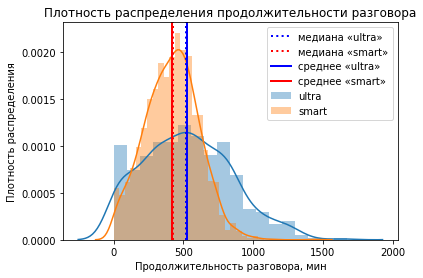

In [48]:
# столбцы для построения гистограмм
tariff_columns_distplot = ['calls_time', 'messages_count', 'gb_used']

ax = sns.distplot(df_tariffs_ultra['calls_time'], label='ultra')
ax = sns.distplot(df_tariffs_smart['calls_time'], label='smart')

ax.set(title='Плотность распределения продолжительности разговора')
ax.set_xlabel('Продолжительность разговора, мин')
ax.set_ylabel('Плотность распределения')

ax.axvline(df_tariffs_ultra['calls_time'].median(), linewidth=2, color='b', ls=':', label="медиана «ultra»")
ax.axvline(df_tariffs_smart['calls_time'].median(), linewidth=2, color='r', ls=':', label="медиана «smart»")

ax.axvline(df_tariffs_ultra['calls_time'].mean(), linewidth=2, color='b', ls='-', label="среднее «ultra»")
ax.axvline(df_tariffs_smart['calls_time'].mean(), linewidth=2, color='r', ls='-', label="среднее «smart»")

ax.legend();

Кривые распределений близки к нормальным. Выраженная асимметрия не просматривается, т.к. средние значения и медианы расположены очень близко друг к другу. Тариф «ultra» имеет более широкий интервал значений.

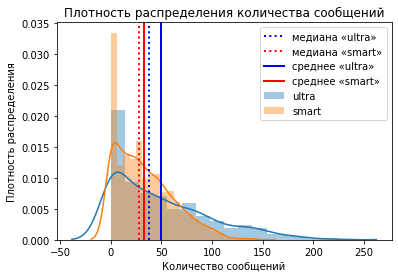

In [49]:
ax = sns.distplot(df_tariffs_ultra['messages_count'], label='ultra')
ax = sns.distplot(df_tariffs_smart['messages_count'], label='smart')

ax.set(title='Плотность распределения количества сообщений')
ax.set_xlabel('Количество сообщений')
ax.set_ylabel('Плотность распределения')

ax.axvline(df_tariffs_ultra['messages_count'].median(), linewidth=2, color='b', ls=':', label="медиана «ultra»")
ax.axvline(df_tariffs_smart['messages_count'].median(), linewidth=2, color='r', ls=':', label="медиана «smart»")

ax.axvline(df_tariffs_ultra['messages_count'].mean(), linewidth=2, color='b', ls='-', label="среднее «ultra»")
ax.axvline(df_tariffs_smart['messages_count'].mean(), linewidth=2, color='r', ls='-', label="среднее «smart»")

ax.legend();

Кривые распределений близки к нормальным. Просматривает выраженная положительная (или правосторонняя) асимметрия, при этом средние значения смещены вправо от медиан. Это говорит о том, что на рассматриваемых тарифах преобладают абоненты, которые обходятся числом сообщений в объеме меньше среднего. Тариф «ultra» имеет более широкий интервал значений.

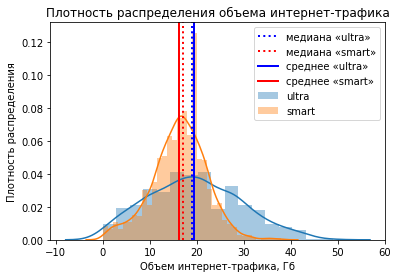

In [50]:
ax = sns.distplot(df_tariffs_ultra['gb_used'], label='ultra')
ax = sns.distplot(df_tariffs_smart['gb_used'], label='smart')

ax.set(title='Плотность распределения объема интернет-трафика')
ax.set_xlabel('Объем интернет-трафика, Гб')
ax.set_ylabel('Плотность распределения')

ax.axvline(df_tariffs_ultra['gb_used'].median(), linewidth=2, color='b', ls=':', label="медиана «ultra»")
ax.axvline(df_tariffs_smart['gb_used'].median(), linewidth=2, color='r', ls=':', label="медиана «smart»")

ax.axvline(df_tariffs_ultra['gb_used'].mean(), linewidth=2, color='b', ls='-', label="среднее «ultra»")
ax.axvline(df_tariffs_smart['gb_used'].mean(), linewidth=2, color='r', ls='-', label="среднее «smart»")

ax.legend();

Кривые распределений близки к нормальным. Выраженная асимметрия практически не просматривается, т.к. средние значения и медианы расположены очень близко друг к другу. Можно отметить, что тариф `smart` имеет незначительную отрицательную (или левостороннюю) асимметрию, тогда как тариф `ultra` едва заметную положительную (или правостороннюю) асимметрию. На тарифе `smart` чуть больше абонентов, которые расходуют интернет-трафик выше среднего. На тарифе `ultra` таким абонентов чуть меньше. Тариф `ultra` имеет более широкий интервал значений.

### Вывод

В данном разделе был выполнен расчет расхода минут разговора, количества сообщений и объема интернет-трафика для каждого из рассматриваемых тарифов по отдельности. Были получены статистические характеристики: среднее, дисперсия и стандартное отклонение. Построены гистограммы плотности распределения. Визуальный анализ гистограмм выявил, что наибольшие отклонения от средних величин в предпочтениях абонентов фиксируется для характеристики «количество сообщений».

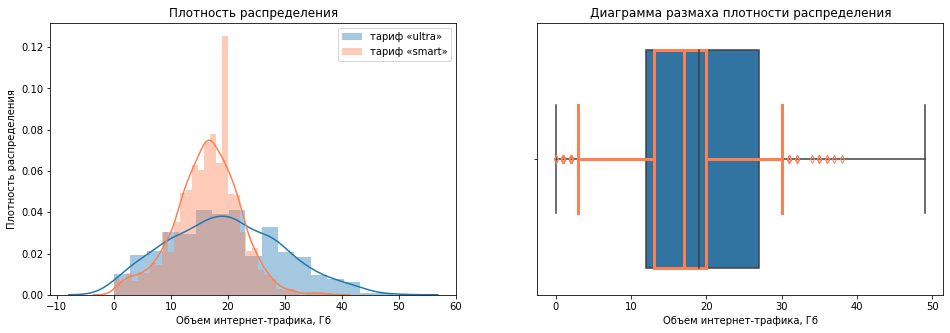

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.distplot(df_tariffs_ultra['gb_used'], ax=axes[0], label='тариф «ultra»')
sns.boxplot(df_tariffs_ultra['gb_used'], ax=axes[1])

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'coral'},
    'medianprops':{'color':'coral'},
    'whiskerprops':{'color':'coral'},
    'capprops':{'color':'coral'},
    'flierprops':{'markerfacecolor':'none', 'markeredgecolor':'coral'}
}

sns.distplot(df_tariffs_smart['gb_used'], ax=axes[0], label='тариф «smart»', color="coral")
sns.boxplot(df_tariffs_smart['gb_used'], ax=axes[1], linewidth=3, **PROPS)

axes[0].set(title='Плотность распределения')
axes[1].set(title='Диаграмма размаха плотности распределения')
axes[0].set_xlabel('Объем интернет-трафика, Гб')
axes[1].set_xlabel('Объем интернет-трафика, Гб')
axes[0].set_ylabel('Плотность распределения')


axes[0].legend();

## Проверка гипотез

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Для анализа берем предварительно полученный датафрейм `df_total`.

In [52]:
df_total.sort_values(by=['user_id', 'month_num'])

,user_id,tariff,month_num,extra_tariff_price
0,1000,ultra,5,1950.0
1,1000,ultra,6,1950.0
2,1000,ultra,7,1950.0
3,1000,ultra,8,1950.0
4,1000,ultra,9,1950.0
...,...,...,...,...
3169,1498,smart,10,1750.0
3170,1499,smart,9,550.0
3171,1499,smart,10,1150.0
3172,1499,smart,11,1513.0


Представленный выше датафрейм будет разделен на две группы в соответствии с тарифом абонента: `ultra` и `ultra`. Эти данные можно рассматривать в качестве двух генеральных совокупностей.  

Формулировка нулевой гипотезы `H0`: средние двух генеральных совокупностей равны между собой.  
Формулировка альтернативной гипотезы `H1`: средние двух генеральных совокупностей не равны между собой.

Пороговое значение уровня значимости `alpha` выбираем равным 5%.

Проверка гипотезы о равенстве среднего двух генеральных совокупностей предполагает предварительную проверку равенства дисперсий.

In [53]:
# создаем датафрейм для тарифа 'ultra'
df_total_income_ultra = df_total.query('tariff == "ultra"')

# создаем датафрейм для тарифа 'smart'
df_total_income_smart = df_total.query('tariff == "smart"')

In [54]:
# вычисляем дисперсию для тарифа 'ultra'
df_total_income_ultra['extra_tariff_price'].var(ddof=1)

141516.7450786183

In [55]:
# вычисляем дисперсию для тарифа 'smart'
df_total_income_smart['extra_tariff_price'].var(ddof=1)

669785.7080064242

In [56]:
# заданное значение уровня значимости
alpha = 0.05


# поскольку дисперсии существенно отличаются, устанавливаем параметр 'equal_var = False'
results = st.ttest_ind(df_total_income_ultra['extra_tariff_price'],
                       df_total_income_smart['extra_tariff_price'],
                       equal_var = False)

print('p-значение: ', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Величина `p-значение` оказалась значительно меньше заданного уровня значимости. Следователь нужно принять альтернативную гипотезу `H1`, т.е. средняя выручка пользователей тарифов «ultra» и «smart» различаются.

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Формулировка нулевой гипотезы `H0`: средние двух генеральных совокупностей равны между собой.  
Формулировка альтернативной гипотезы `H1`: средние двух генеральных совокупностей не равны между собой.

Изучаемый датафрейм `df_total` как финальная таблица не содержит данных о города проживания абонентов. Эти данные понадобились только для представленного ниже вычисления. Дополним датафрейм `df_total` необходимой информацией.

In [57]:
# объединяем исследуемый датафрейм 'df_total' и датаферйм с данными о городах проживания абонентов 'df_users'
df_total_income_city = pd.merge(df_total, df_users, on='user_id', how='left')

# выбираем только необходимые для дальнейшей работы столбцы
df_total_income_city = df_total_income_city[['user_id', 'city', 'extra_tariff_price']]
df_total_income_city.sort_values(by='user_id')

,user_id,city,extra_tariff_price
0,1000,Краснодар,1950.0
1,1000,Краснодар,1950.0
2,1000,Краснодар,1950.0
3,1000,Краснодар,1950.0
4,1000,Краснодар,1950.0
...,...,...,...
3169,1498,Владикавказ,1750.0
3173,1499,Пермь,598.0
3170,1499,Пермь,550.0
3171,1499,Пермь,1150.0


In [58]:
# создаем датафрейм для города 'Москва'
df_total_income_Moscow = df_total_income_city.query('city == "Москва"')

# создаем датафрейм для остальных городов
df_total_income_reginons = df_total_income_city.query('city != "Москва"')

In [59]:
# вычисляем дисперсию для датафрейма с городом 'Москва'
df_total_income_Moscow['extra_tariff_price'].var(ddof=1)

565636.467011886

In [60]:
# вычисляем дисперсию для датафрейма с городом 'Москва'
df_total_income_reginons['extra_tariff_price'].var(ddof=1)

654137.6285218114

Если в первом случае дисперсии отличались в несколько раз, то здесь различие дисперсий не столь существенное. Значение настраиваемого параметра оставляем по умолчанию, т.е. `equal_var = True`

In [61]:
# заданное значение уровня значимости
alpha = 0.05


results = st.ttest_ind(df_total_income_Moscow['extra_tariff_price'],
                       df_total_income_reginons['extra_tariff_price'],
                       equal_var = True)

print('p-значение: ', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Величина `p-значение` оказалась больше заданного уровня значимости. Следователь нужно принять нулевую гипотезу `H0`, т.е. средняя выручка пользователей в городе Москва и других городов не отличается.

### Вывод

В данном разделе были выполнены проверки различных статистических гипотез. Установлено, что средняя выручка для абонентов тарифов `ultra` и `smart` отличается. Для абонентов в городе Москва и других городов различий в средней выручки нет.

In [62]:
from scipy.stats import bartlett, levene

# вычисляем дисперсию для тарифа 'ultra'
print('var1 =', df_total_income_ultra['extra_tariff_price'].var(ddof=1))

# вычисляем дисперсию для тарифа 'smart'
print('var2 =', df_total_income_smart['extra_tariff_price'].var(ddof=1))

stat, p = levene(df_total_income_ultra['extra_tariff_price'], df_total_income_smart['extra_tariff_price'])
print('проверка по Левене, p =', p)

stat, p = bartlett(df_total_income_ultra['extra_tariff_price'], df_total_income_smart['extra_tariff_price'])
print('проверка по Бартлетту, p =', p)

print('='*50, end='\n\n')

# вычисляем дисперсию для датафрейма с городом 'Москва'
print('var1 =', df_total_income_Moscow['extra_tariff_price'].var(ddof=1))

# вычисляем дисперсию для датафрейма с городом 'Москва'
print('var2 =', df_total_income_reginons['extra_tariff_price'].var(ddof=1))

stat, p = levene(df_total_income_Moscow['extra_tariff_price'], df_total_income_reginons['extra_tariff_price'])
print('проверка по Левене, p =', p)

stat, p = bartlett(df_total_income_Moscow['extra_tariff_price'], df_total_income_reginons['extra_tariff_price'])
print('проверка по Бартлетту, p =', p)

var1 = 141516.7450786183
var2 = 669785.7080064242
проверка по Левене, p = 1.8783148636310733e-122
проверка по Бартлетту, p = 1.96362114492455e-141

var1 = 565636.467011886
var2 = 654137.6285218114
проверка по Левене, p = 0.014082487123270156
проверка по Бартлетту, p = 0.02445441261003286


## Общий вывод

В ходе проведенного исследования было изучено 500 абонентов мобильного оператора на тарифах `ultra` и `smart`.  

Были выполнены расчеты стоимости дополнительных услуг (добавочные минуты разговора, сообщения и объем интернет-трафика), которыми пользовались абоненты после исчерпания лимита тарифного плана.

Средняя выручка для абонентов тарифа `ultra` составляет 2070 рублей в месяц, тарифа `smart` приблизительно 1290 рублей в месяц. При уровне абонентской платы (`ultra` = 1950 р/месяц и `smart` = 550 р/месяц) можно отметить, что пользователи тарифа `smart` переплачивают за дополнительные услуги приблизительно его вторую стоимость. Пользователи более дорогого тарифа `ultra` практически полностью укладываются в отведенные лимиты.

Статистический анализ проверки гипотез выявил, что средние выручки абонентов тарифов `ultra` и `smart` не равны. Если рассматривать географическую привязку, то средние выручки абонентов города Москва и других городов не отличаются.